#Feature mapping (increasing capacity of the model)

##Data

In [0]:
import torch
import matplotlib.pyplot as plt

In [0]:
X = torch.tensor([0, 2, 4.5, 6, 6.5]).unsqueeze(1).float()
y = torch.tensor([0, 5, 4.5, 6.6, 6]).unsqueeze(1).float()

In [0]:
X.shape


torch.Size([5, 1])

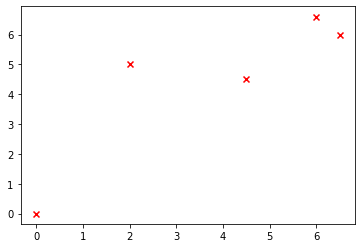

In [0]:
plt.scatter(X.numpy(), y, marker = 'x', color = 'red')

##Linar Regression

####Linear Regression implementation

In [0]:
def cost_fn(a, y):
  m = y.numel()
  J = torch.sum(torch.pow(a-y, 2))/2/m
  return J

In [0]:
def backward(X, a, y):
  m = y.numel()
  dw = (a-y).t()@X/ m
  db = torch.sum(a-y)/m
  return dw, db  

In [0]:
def initialize_with_zeros(dim):
  w = torch.zeros((1, dim))
  b = torch.tensor([0.0])

  return w, b

In [0]:
def model(X, w, b):  
  return X@w.t() + b

In [0]:
def predict(X, w, b):
  y_predict = model(X, w, b)       
        
  return y_predict

In [0]:
def train(X, y, epochs, lr):
  
  J_history = []
  w, b = initialize_with_zeros(X.shape[1])

  for i in range(epochs):
    a = model(X, w, b)  
    J = cost_fn(a, y)
    dw, db = backward(X, a, y)
    w -= lr*dw
    b -= lr*db
    
    # Recording the costs
    if i % 1 == 0:
      J_history.append(J)
    
    
     
  return w, b, J_history

####Fitting Linear Model

In [0]:
#Defining the learning rate value and the number of epochs
epochs = 100
lr = 0.005

In [0]:
#Training the model
w, b, J_h = train(X, y, epochs, lr)

In [0]:
#values of w, b, and the final error
w, b, J_h[-1]

(tensor([[1.0013]]), tensor([0.3409]), tensor(0.8082))

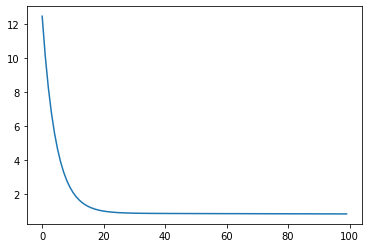

In [0]:
#Plotting the cost function
plt.plot(J_h)

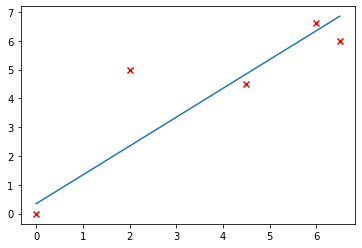

In [0]:
plt.scatter(X, y, marker = 'x', color = 'red')
plt.plot(X, X@w.t()+b)

##Polynomial Regression

###Feature Mapping

In [0]:
#variable that defines the degree of a polynomial. For now I will start with degree = 2
degree = 2

In [0]:
#featureMap creates new features x^i
def featureMap(X, degree):
  X_p = []
  for i in range (1, degree+1):
    tempo = (X.pow(i))
    X_p.append(tempo)
  X_p = torch.stack(X_p, dim = 1)
  return X_p

In [0]:
X_p = featureMap(X[:,0], degree)

In [0]:
X_p.shape

torch.Size([5, 2])

In [0]:
X_p

tensor([[ 0.0000,  0.0000],
        [ 2.0000,  4.0000],
        [ 4.5000, 20.2500],
        [ 6.0000, 36.0000],
        [ 6.5000, 42.2500]])

####fitting the model

In [0]:
#Defining the learning rate value and the number of epochs
epochs = 5000
lr = 0.0005

In [0]:
#Training the model
w, b, J_h = train(X_p, y, epochs, lr)

In [0]:
#values of w, b, and the final error
w, b, J_h[-1]

(tensor([[ 1.5594, -0.1132]]), tensor([0.7781]), tensor(0.4342))

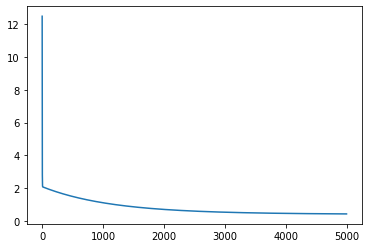

In [0]:
plt.plot(J_h)

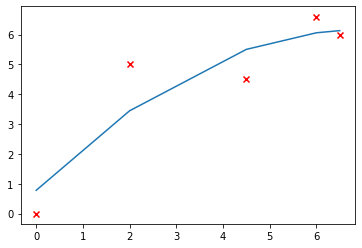

In [0]:
#Plotting our data
plt.scatter(X[:,0], y, marker = 'x', color = 'red')
plt.plot(X[:,0], X_p@w.t() + b)

####Alternative way to plot the hypothesis function $\hat y$

In [0]:
#Selecting the min and max values of the range where values of X are scattered
x_min = torch.min(X[:,0])
x_max = torch.max(X[:,0])

In [0]:
xx = torch.arange(x_min, x_max+0.1, step = 0.3)

In [0]:
xx_p = featureMap(xx, degree)

In [0]:
preds= xx_p@w.t()+b  

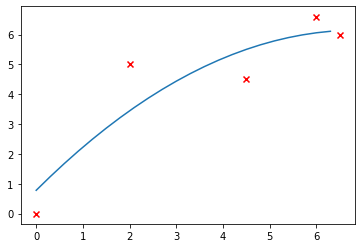

In [0]:
plt.scatter(X.numpy(), y, marker = 'x', color = 'red')
plt.plot(xx, preds)

###Feature Scaling

In [0]:
def featureNormalize(X):
  mu = torch.mean(X, dim = 0).unsqueeze(0)  
  std = torch.std(X, dim = 0).unsqueeze(0)
  X_norm = (X - mu)/std
  return X_norm, mu, std

In [0]:
X_norm, mu, std = featureNormalize(X_p)

In [0]:
epochs = 100
lr = 1

In [0]:
w, b, J_h = train(X_norm, y, epochs, lr)

In [0]:
#values of w, b, and the final error
w, b, J_h[-1]

(tensor([[ 5.2031, -3.0469]]), tensor([4.4200]), tensor(0.3958))

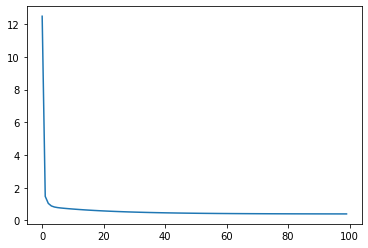

In [0]:
plt.plot(J_h)

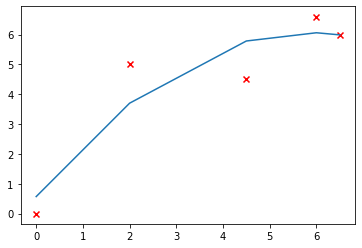

In [0]:
#let's plot
plt.scatter(X[:,0], y, marker = 'x', color = 'red')
plt.plot(X[:,0], X_norm@w.t() + b)


###Polynomial regression of higher degree

Experimenting with polynomials of higher degree, say degree = 6.

In [0]:
degree = 6

In [0]:
# applying feature Map to X
X_p1 = featureMap(X[:,0], degree)

In [0]:
X_p1.shape

torch.Size([5, 2])

In [0]:
X_norm1, mu, std = featureNormalize(X_p1)

In [0]:
epochs = 40000
lr = 0.43

In [0]:
#train the model
w, b, J_h = train(X_norm1, y, epochs, lr)

In [0]:
w, b, J_h[-1]

(tensor([[ 5.6102, -3.4540]]), tensor([4.4200]), tensor(0.3917))

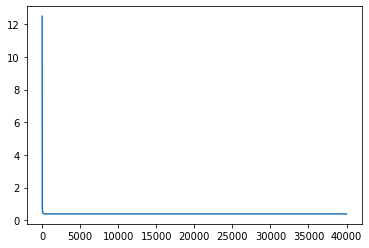

In [0]:
plt.plot(J_h)

####Plot the hypothesis function

Let's plot using the alternative method to get smooth curvature

In [0]:
# define x values
x = torch.arange(torch.min(X[:,0])-0.1, torch.max(X[:,0]+0.1), 0.1).unsqueeze(1)

In [0]:
x_p = featureMap(x[:,0], degree)

In [0]:
#since we've applied feature scaling to initial data set, we need to normalize also values x_p
x_norm = (x_p-mu)/std

In [0]:
#calculate predictions
preds = x_norm@w.t()+b

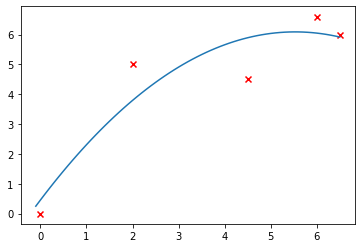

In [0]:
#let's plot our data
plt.scatter(X, y, marker = 'x', color = 'red')
plt.plot(x, preds)